<a href="https://www.kaggle.com/code/p4rlxdev/spaceship-titanic-nullzero-fastai-2022?scriptVersionId=123571739" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1)





## Data

In [3]:
#Use the Path module to highight
pd.options.display.float_format = '{:.2f}'.format
path = Path('/kaggle/input/spaceship-titanic')

In [4]:
print(path)
df_train = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')
df_test.head()

/kaggle/input/spaceship-titanic


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


<AxesSubplot:>

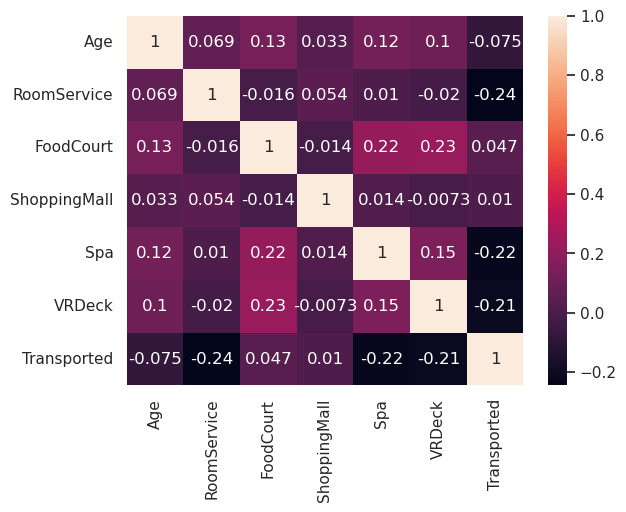

In [6]:
sns.heatmap(df_train.corr(), annot=True)

In [7]:
df_train['HomePlanet'].unique()

df_train.drop('VIP', axis=1, inplace=True)
df_test.drop('VIP',axis = 1, inplace= True)




In [8]:
columns = ['Destination', 'Name', 'HomePlanet', 'Name']
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [9]:
df_train.drop(columns, axis=1, inplace=True)
df_test.drop(columns,axis = 1, inplace= True)


Fill all NA Values with the mode across all columns in place


In [10]:
df_train['TotalExp'] = 0
df_train['TotalExp'].isna().sum()
df_test['TotalExp'] = 0

In [11]:
df_train.head()

,PassengerId,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp
0,0001_01,False,B/0/P,39.00,0.00,0.00,0.00,0.00,0.00,False,0
1,0002_01,False,F/0/S,24.00,109.00,9.00,25.00,549.00,44.00,True,0
2,0003_01,False,A/0/S,58.00,43.00,3576.00,0.00,6715.00,49.00,False,0
3,0003_02,False,A/0/S,33.00,0.00,1283.00,371.00,3329.00,193.00,False,0
4,0004_01,False,F/1/S,16.00,303.00,70.00,151.00,565.00,2.00,True,0


In [12]:
'''#new_features training set
mode = df_train['CryoSleep'].mode()

df_train['TotalExp'] = np.nan
df_train.loc['CryoSleep'].null().mode = mode
if df_train.loc[df_train['CryoSleep']] == True:
    df_train['TotalExp'].isna().tonumeric()
    df_train.loc[df_train['CryoSleep']==True, "TotalExp"] = np.float32(0) 
    df_test.loc[df_test['CryoSleep']==True, "TotalExp"] = np.float32(0)
else:
    df_train["TotalExp"] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall',"Spa","VRDeck"]].sum()'''

'#new_features training set\nmode = df_train[\'CryoSleep\'].mode()\n\ndf_train[\'TotalExp\'] = np.nan\ndf_train.loc[\'CryoSleep\'].null().mode = mode\nif df_train.loc[df_train[\'CryoSleep\']] == True:\n    df_train[\'TotalExp\'].isna().tonumeric()\n    df_train.loc[df_train[\'CryoSleep\']==True, "TotalExp"] = np.float32(0) \n    df_test.loc[df_test[\'CryoSleep\']==True, "TotalExp"] = np.float32(0)\nelse:\n    df_train["TotalExp"] = df_train[[\'RoomService\', \'FoodCourt\', \'ShoppingMall\',"Spa","VRDeck"]].sum()'

In [13]:
df_train.head()

,PassengerId,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp
0,0001_01,False,B/0/P,39.00,0.00,0.00,0.00,0.00,0.00,False,0
1,0002_01,False,F/0/S,24.00,109.00,9.00,25.00,549.00,44.00,True,0
2,0003_01,False,A/0/S,58.00,43.00,3576.00,0.00,6715.00,49.00,False,0
3,0003_02,False,A/0/S,33.00,0.00,1283.00,371.00,3329.00,193.00,False,0
4,0004_01,False,F/1/S,16.00,303.00,70.00,151.00,565.00,2.00,True,0


In [14]:
mean_train = df_train.mean()
mean_test = df_test.mean()

mode_train = df_train.mean()
mode_test = df_test.mean()

df_train['Cabin'] = df_train['Cabin'].replace("A", "B/O/P")



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWar

In [15]:
df_train['Age'].fillna(mean_train, inplace=True)
df_test['Age'].fillna(mean_test, inplace=True)

#df_train['Cabin'].fillna("A1", inplace=True)
#df_test['Cabin'].fillna("A1", inplace=True)


#df_train['Cabin'].fillna(df_['Cabin'].mean())
#df_test['Cabin'].fillna(['Cabin'].mean())

Doneski!

In [16]:
df_train.isna().sum()

PassengerId       0
CryoSleep       217
Cabin           199
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
TotalExp          0
dtype: int64

In [17]:
df_train.head()

,PassengerId,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp
0,0001_01,False,B/0/P,39.00,0.00,0.00,0.00,0.00,0.00,False,0
1,0002_01,False,F/0/S,24.00,109.00,9.00,25.00,549.00,44.00,True,0
2,0003_01,False,A/0/S,58.00,43.00,3576.00,0.00,6715.00,49.00,False,0
3,0003_02,False,A/0/S,33.00,0.00,1283.00,371.00,3329.00,193.00,False,0
4,0004_01,False,F/1/S,16.00,303.00,70.00,151.00,565.00,2.00,True,0


In [18]:
#Fill train NA

#df_train.fillna({'RoomService':mean, 'Age':mean, 'FoodCourt':mean, 'ShoppingMall':mean,'Spa':mean,'VRDeck':mean, 'VIP':mode}, inplace=True)
mean = df_train.mean()
mode = df_train.mode()
df_train.fillna({'RoomService':mean['RoomService'], 
                 'Age':mean['Age'], 
                 'FoodCourt':mean['FoodCourt'], 
                 'ShoppingMall':mean['ShoppingMall'],
                 'Spa':mean['Spa'],
                 'VRDeck':mean['VRDeck'],
                'CryoSleep':mode["CryoSleep"],
                }, 
               inplace=True)
df_train['CryoSleep'].fillna(0, inplace=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [19]:
df_train.isna().sum()

PassengerId       0
CryoSleep         0
Cabin           199
Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
TotalExp          0
dtype: int64

In [20]:
#Fill test NA
#df_test.fillna({'RoomService':mean, 'Age':mean, 'FoodCourt':mean, 'ShoppingMall':mean,'Spa':mean,'VRDeck':mean}, inplace=True)
mean = df_test.mean()
mode = df_test.mode()
df_test.fillna({'RoomService':mean['RoomService'], 
                 'Age':mean['Age'], 
                 'FoodCourt':mean['FoodCourt'], 
                 'ShoppingMall':mean['ShoppingMall'],
                 'Spa':mean['Spa'],
                 'VRDeck':mean['VRDeck'], 
               'CryoSleep':mode['CryoSleep']},
               inplace=True)
df_test['CryoSleep'].fillna(False, inplace=True)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_train.head()

,PassengerId,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp
0,0001_01,False,B/0/P,39.00,0.00,0.00,0.00,0.00,0.00,False,0
1,0002_01,False,F/0/S,24.00,109.00,9.00,25.00,549.00,44.00,True,0
2,0003_01,False,A/0/S,58.00,43.00,3576.00,0.00,6715.00,49.00,False,0
3,0003_02,False,A/0/S,33.00,0.00,1283.00,371.00,3329.00,193.00,False,0
4,0004_01,False,F/1/S,16.00,303.00,70.00,151.00,565.00,2.00,True,0


In [22]:
#If CryoSleep Total Expenditure = 0
column_exp = ['RoomService', 'FoodCourt', 'ShoppingMall', "Spa", 'VRDeck']



#df_train.loc[df_train['CryoSleep'] == True, 'TotalExp'] = np.float32(0.00)
#df_test.loc[df_test['CryoSleep'] == True, 'TotalExp'] = np.float32(0.00)
df_train['TotalExp'] = 0
#df_train['TotalExp'].fillna(0, inplace=True)
#df_test['TotalExp'].fillna(0, inplace=True)

df_train['TotalExp'] = df_train.loc[df_train['CryoSleep'] == False, ['RoomService', 'FoodCourt', 'ShoppingMall', "Spa", 'VRDeck']].sum(axis=1)
df_test['TotalExp'] = df_test.loc[df_test['CryoSleep'] == False, ['RoomService', 'FoodCourt', 'ShoppingMall', "Spa", 'VRDeck']].sum(axis=1)

df_train['TotalExp'].fillna(0, inplace=True)
df_test['TotalExp'].fillna(0, inplace=True)


#df_train.groupby('TotalExp')[column_exp].sum()
#df_test.groupby('TotalExp')[column_exp].sum()

#df_train.loc[df_train['CryoSleep'] == False, 'TotalExp'] = df_train[column_exp].sum(axis=1)
#df_test.loc[df_test['CryoSleep'] == False, 'TotalExp'] = df_test[column_exp].sum(axis=1)






#df_train.fillna(df_train['CryoSleep'] == False, [[column_exp]].sum(axis=1), inplace=True)
#df_test.fillna(df_test['CryoSleep'] == False, [[column_exp]].sum(axis=1), inplace=True)

#sums = df.loc[df['B'] > 5, ['A', 'C']].sum()




#df_train.fillna(df_train.sum(column_exp), inplace=True)
#df_test.fillna(df_test.sum(column_exp), inplace=True)


#df_train.loc[df_train['CryoSleep'] == False, 'TotalExp'] = df_train[column_exp].sum().astype(float)
#df_test.loc[df_test['CryoSleep'] == False, 'TotalExp'] = df_test[column_exp].sum().astype(float)



In [23]:
df_test.head()

,PassengerId,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalExp
0,0013_01,True,G/3/S,27.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0018_01,False,F/4/S,19.00,0.00,9.00,0.00,2823.00,0.00,2832.00
2,0019_01,True,C/0/S,31.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0021_01,False,C/1/S,38.00,0.00,6652.00,0.00,181.00,585.00,7418.00
4,0023_01,False,F/5/S,20.00,10.00,0.00,635.00,0.00,0.00,645.00


In [24]:
#df_train[["TotalExp"] > 0].count()
df_train["TotalExp"].dtype

dtype('float64')

In [25]:
# Replace NaN's with outliers for now (so we can split feature)
df_train['Cabin'].fillna('Z/9999/Z', inplace=True)
df_test['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
df_train['Cabin_deck'] = df_train['Cabin'].apply(lambda x: x.split('/')[0])
df_test['Cabin_deck'] = df_test['Cabin'].apply(lambda x: x.split('/')[0])
df_train['Cabin_number'] = df_train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df_train['Cabin_side'] = df_train['Cabin'].apply(lambda x: x.split('/')[2])

# New features - test set
df_test['Cabin_deck'] = df_test['Cabin'].apply(lambda x: x.split('/')[0])
df_test['Cabin_number'] = df_test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
df_test['Cabin_side'] = df_test['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
df_train.loc[df_train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
df_train.loc[df_train['Cabin_number']==9999, 'Cabin_number']=np.nan
df_train.loc[df_train['Cabin_side']=='Z', 'Cabin_side']=np.nan
df_test.loc[df_test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
df_test.loc[df_test['Cabin_number']==9999, 'Cabin_number']=np.nan
df_test.loc[df_test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Drop Cabin (we don't need it anymore)
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

#df_train['Cabin_deck'].fillnull(np.mean, inplace=True)
df_train['Cabin_number'].fillna(np.mean, inplace=True)
df_train['Cabin_side'].fillna(np.mean, inplace=True)

#df_test['Cabin_deck'].fillnull(np.mean, inplace=True)
df_test['Cabin_number'].fillna(np.mean, inplace=True)
df_test['Cabin_side'].fillna(np.mean, inplace=True)

In [26]:
df_train.head()


,PassengerId,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp,Cabin_deck,Cabin_number,Cabin_side
0,0001_01,False,39.00,0.00,0.00,0.00,0.00,0.00,False,0.00,B,0.00,P
1,0002_01,False,24.00,109.00,9.00,25.00,549.00,44.00,True,736.00,F,0.00,S
2,0003_01,False,58.00,43.00,3576.00,0.00,6715.00,49.00,False,10383.00,A,0.00,S
3,0003_02,False,33.00,0.00,1283.00,371.00,3329.00,193.00,False,5176.00,A,0.00,S
4,0004_01,False,16.00,303.00,70.00,151.00,565.00,2.00,True,1091.00,F,1.00,S


In [27]:
df_test.isna().sum()
df_train.head()
df_train['Cabin_deck'].mode()

0    F
dtype: object

In [28]:
df_train['Cabin_deck'].fillna('F', inplace=True)
df_test['Cabin_deck'].fillna('F', inplace=True)

In [29]:
df_train.head()

,PassengerId,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalExp,Cabin_deck,Cabin_number,Cabin_side
0,0001_01,False,39.00,0.00,0.00,0.00,0.00,0.00,False,0.00,B,0.00,P
1,0002_01,False,24.00,109.00,9.00,25.00,549.00,44.00,True,736.00,F,0.00,S
2,0003_01,False,58.00,43.00,3576.00,0.00,6715.00,49.00,False,10383.00,A,0.00,S
3,0003_02,False,33.00,0.00,1283.00,371.00,3329.00,193.00,False,5176.00,A,0.00,S
4,0004_01,False,16.00,303.00,70.00,151.00,565.00,2.00,True,1091.00,F,1.00,S


Future feature engineering:
- Drop Destination?
- Add 1 to any 0's unless done in the dls


In [30]:
df_test.isna().sum()

PassengerId     0
CryoSleep       0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
TotalExp        0
Cabin_deck      0
Cabin_number    0
Cabin_side      0
dtype: int64

In [31]:
splits = RandomSplitter()(df_train)

In [32]:
dls = TabularPandas(
    df_train, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["PassengerId","Cabin_deck", "CryoSleep", "Cabin_side"],
    cont_names=['Age', 'TotalExp'],
    y_names="Transported", y_block = CategoryBlock(),
).dataloaders(path=".")

The data and model together make up a Learner. To create one, we say what the data is (dls), and the size of each hidden layer ([10,10]), along with any metrics we want to print along the way:

In [33]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.10000000149011612, valley=0.007585775572806597)

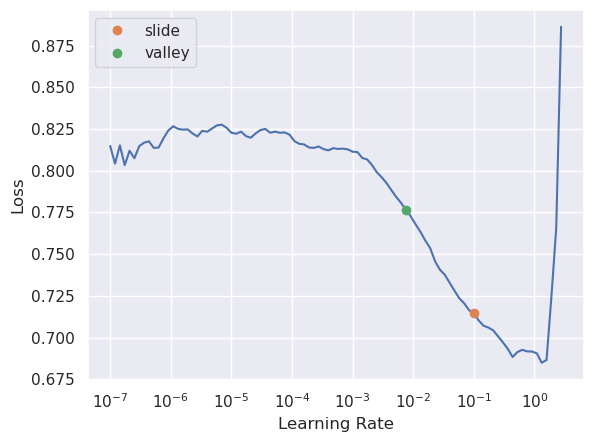

In [34]:
learn.lr_find(suggest_funcs=(slide, valley))

In [35]:
learn.fit(16, lr=0.02)

epoch,train_loss,valid_loss,accuracy,time
0,0.547290,0.557424,0.714039,00:01
1,0.125208,0.652623,0.696778,00:01
2,0.049941,0.984892,0.710011,00:01
3,0.032723,1.152908,0.659954,00:01
4,0.018222,0.826598,0.692750,00:01
5,0.017742,0.985234,0.695627,00:01
6,0.020403,0.936605,0.701956,00:01
7,0.028400,0.853244,0.714039,00:01
8,0.025442,0.936905,0.734177,00:01
9,0.020013,1.003600,0.737054,00:01


Data loader for the test data

In [36]:
dl_test = learn.dls.test_dl(df_test)

In [37]:
preds,_ = learn.get_preds(dl=dl_test)

In [38]:
df_test['Transported'] = (preds[:,1]>0.5).int()
column_names = 'Transported'
df_test[column_names] = df_test[column_names].astype(bool)
sub_df = df_test[['PassengerId','Transported']]
sub_df.shape




(4277, 2)

In [39]:
sub_df.to_csv('new_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [40]:
!head submission.csv

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
head: cannot open 'submission.csv' for reading: No such file or directory


Ideas for improvement
- Check rules
- confirm dls format
- Feature engineering of the first.
- Take seed out of line 39